In [0]:
#Este programa é utilizado para o desenvolvimento do trabalho prático da disciplina FAM do bootcamp de MLE

In [0]:
#importando as bibliotecas
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import seaborn as sns #biblioteca utilizada para criar gráficos mais bonitos
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import google

In [0]:
# abrir o arquivo csv que contém os dados s serem utilizados a prática
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [0]:
#apresentando as 5 primeiras linhas do banco de dados
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
#verificando a existência de campos nulos
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
#verificando a existência de campos nulos
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
#adicionando valores nulos
customers_null=customers
for col in customers_null.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, col] = np.nan

In [0]:
#verificando as colunas nulas
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              162 non-null    float64
 1   Gender                  164 non-null    object 
 2   Age                     161 non-null    float64
 3   Annual Income (k$)      161 non-null    float64
 4   Spending Score (1-100)  163 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [0]:
#analisando o dataset
customers_null.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,NaN,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,NaN,23.0,16.0,77.0
4,NaN,NaN,31.0,17.0,40.0
5,6.0,Female,22.0,NaN,NaN
6,7.0,NaN,35.0,18.0,6.0
7,NaN,NaN,NaN,18.0,94.0
8,9.0,Male,64.0,NaN,3.0
9,10.0,Female,30.0,NaN,72.0


In [0]:
#verificando a existência de campos nulos
customers_null.isnull().sum()

CustomerID                38
Gender                    36
Age                       39
Annual Income (k$)        39
Spending Score (1-100)    37
dtype: int64

In [0]:
#deletando as linhas que possuem algum valor nulo
customers_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
11,12.0,Female,35.0,19.0,99.0
14,15.0,Male,37.0,20.0,13.0
18,19.0,Male,52.0,23.0,29.0
...,...,...,...,...,...
191,192.0,Female,32.0,103.0,69.0
193,194.0,Female,38.0,113.0,91.0
195,196.0,Female,35.0,120.0,79.0
198,199.0,Male,32.0,137.0,18.0


In [0]:
#preenchendo os valores nan com o valor 0
customers_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,0,23.0,16.0,77.0
4,0.0,0,31.0,17.0,40.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.0,79.0
196,0.0,Female,45.0,126.0,28.0
197,198.0,Male,0.0,126.0,74.0
198,199.0,Male,32.0,137.0,18.0


In [0]:
#encontra as estastisticas do dataset
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,162.000000,161.000000,161.000000,163.000000
mean,102.296296,39.416149,61.173913,50.269939
std,57.682671,14.030128,26.589840,26.092206
min,2.000000,18.000000,15.000000,1.000000
25%,52.750000,29.000000,42.000000,32.000000
50%,104.500000,37.000000,62.000000,50.000000
75%,152.750000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [0]:
#preenchendo os valores médios da coluna
customers_null.fillna(customers_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,102.296296,Male,19.000000,15.0,39.0
1,2.000000,Male,21.000000,15.0,81.0
2,3.000000,Female,20.000000,16.0,6.0
3,4.000000,NaN,23.000000,16.0,77.0
4,102.296296,NaN,31.000000,17.0,40.0
...,...,...,...,...,...
195,196.000000,Female,35.000000,120.0,79.0
196,102.296296,Female,45.000000,126.0,28.0
197,198.000000,Male,39.416149,126.0,74.0
198,199.000000,Male,32.000000,137.0,18.0


In [0]:
#analisando o banco de dados
#função que retorna uma análise superficial dos dados
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,162.000000,161.000000,161.000000,163.000000
mean,102.296296,39.416149,61.173913,50.269939
std,57.682671,14.030128,26.589840,26.092206
min,2.000000,18.000000,15.000000,1.000000
25%,52.750000,29.000000,42.000000,32.000000
50%,104.500000,37.000000,62.000000,50.000000
75%,152.750000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**count** = número de elementos (linhas) existente no banco de dados

**mean** = média dos calores na coluna

**std** = desvio padrão dos dados presentes na coluna

**min** = menor valor existente na coluna

**25%** = primeiro quartil dos dados (25%)

**50%** = segundo quartil dos dados (50%)

**50%** = terceiro quartil dos dados (75%)

**max** = valor máximo existente na coluna

Veridicando se exitem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot

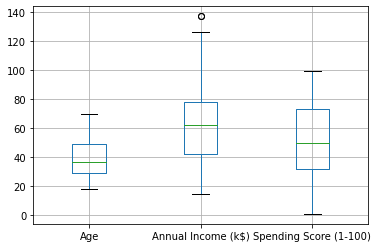

In [0]:
#constroi o boplot para as colunas desejadas
boxplot = customers.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

Veridicando se exitem outliers (anomalias) nos dados. Para isso, será utilizado o Z-Score

In [0]:
#Z-score
from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result=np.where(z > threshold)

df_salario_outlier=customers.iloc[result[0]]
#print(z)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [0]:
#todos os usuários com sajário anual com possivel outlier
df_salario_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Explorando os dados. Entendendo alguns relacionamentos e comportamentos dos clientes.

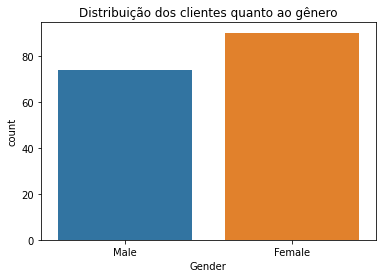

In [0]:
#analisando a distribuição dos clientes por gênero
#cria o gráfico que conta a quantidade de consumidores existente em cada um dos gêneros
#adiciona o título no gráfico
sns.countplot(x='Gender', data=customers);
plt.title('Distribuição dos clientes quanto ao gênero');

Distribuição dos consumidores pela idade

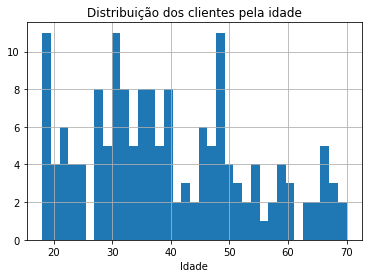

In [0]:
#analisando a distribuiçãoi dos clientes quanto a idade atrvés do histograma
#seleciona a coluna idade para realizar o histograma
#os "bins" indicam a quantidade de grupos que se deseja dividir os dados
#adiciona o título ao gráfico (histograma)
customers.hist('Age', bins=35);

plt.title('Distribuição dos clientes pela idade');
plt.xlabel('Idade');

Aplicando a codificação aos dados

In [0]:
#copiando as colunas que são do tipo categoricas
cat_df_customers = customers.select_dtypes(include=['object'])

In [0]:
cat_df_customers.head()

,Gender
0,Male
1,Male
2,Female
3,NaN
4,NaN


Aplicando mapeamento

In [0]:
replace_map = {'Gender': {'Male': 1, 'Female': 2}} #define o dicionário a ser utilizado (map)
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist() #encontra a lista das variáveis categóricas
replace_map_comp = {'Gender' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}#define o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [0]:
#aplica o mapeamento para o dataset
cat_df_customers_replace =pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [0]:
#aplica o mapeamento para o dataset
cat_df_customers_replace.replace(replace_map_comp, inplace=True)
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Aplicando o Label Encodering

In [0]:
#cat_df_customers_lc = customers
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [0]:
cat_df_customers_lc=customers

In [0]:
cat_df_customers_lc['Gender']=pd.Categorical(cat_df_customers_lc["Gender"])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [0]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [0]:
#importando o label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #instanciado o objeto

In [0]:
#aplicando a codificação para as colunas categéricas
customers_label=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_label['Gender'] = le.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


One Hot Encoding

In [0]:
#Get dummies
#customers_one_hot['Gender']=pd.Categorical(customers_one_hot['Gender'])
#customers_one_hot head
customers_one_hot=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_one_hot= pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [0]:
customers=pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [0]:
#importe OneHotEncoder
customers_one_hot=customers
from sklearn.preprocessing import OneHotEncoder

#intancia o objeto
ohe = OneHotEncoder()

In [0]:
#aplica o one hot encoding para a coluna
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1,1)).toarray() #It returns an numpy array
customers_ohe.shape

(200, 2)

In [0]:
customers_ohe

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.